# Beta Chain Model Comparisons

## Setup

In [36]:
import os
from pathlib import Path
import sys

if '__project_dir__' not in globals():
    __project_dir__ = Path.cwd().parent.resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [37]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [38]:
BENCHMARKING_PARENT_DIR = Path('benchmarks_beta')

In [39]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

## k-NN Scores

In [40]:
knn_scores = {mdict['model_name']: mdict['knn_scores'] for mdict in metric_dicts}
knn_scores = pd.DataFrame.from_dict(knn_scores, orient='index')
knn_scores = knn_scores.sort_values(by='5')
knn_scores.columns = knn_scores.columns.map(lambda x: f'k={x}')

In [41]:
knn_scores

,k=5,k=10,k=50,k=100
BCDR3BERT -pos,0.118621,0.118621,0.110345,0.111379
BCDR3BERT (rel pos),0.144483,0.151379,0.146207,0.132414
BCDR3BERT (BD pos),0.146552,0.152759,0.141724,0.136897
BCDR3BERT,0.156897,0.161724,0.146207,0.142414
CDR3 Levenshtein,0.172414,0.172759,0.153448,0.143793
BVCDR3BERT,0.189310,0.192759,0.174828,0.159655
BCDR3BERT +ACL,0.190000,0.189310,0.197241,0.187586
BCDR3BERT +ACL (cns x2),0.212069,0.215862,0.192759,0.183793
BCDRBERT,0.212414,0.217586,0.220690,0.207931
BCDR3BERT +ACL (cns),0.213103,0.220690,0.194483,0.182759


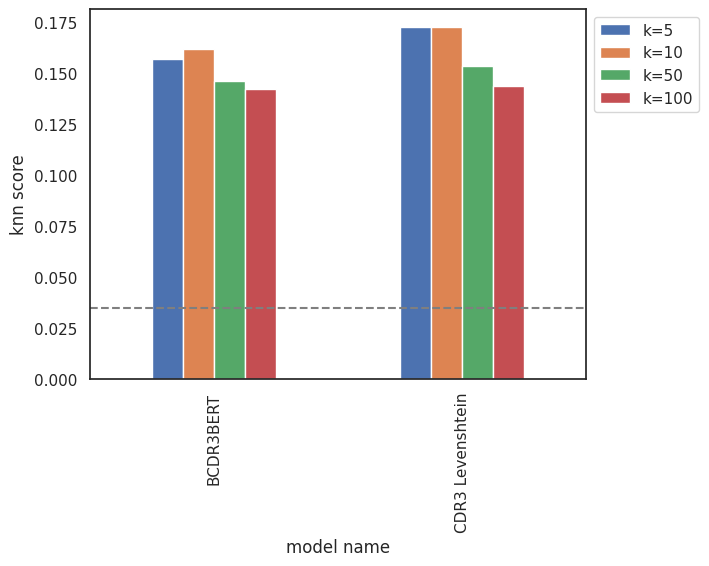

In [42]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'CDR3 Levenshtein']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn better if you add positional info?

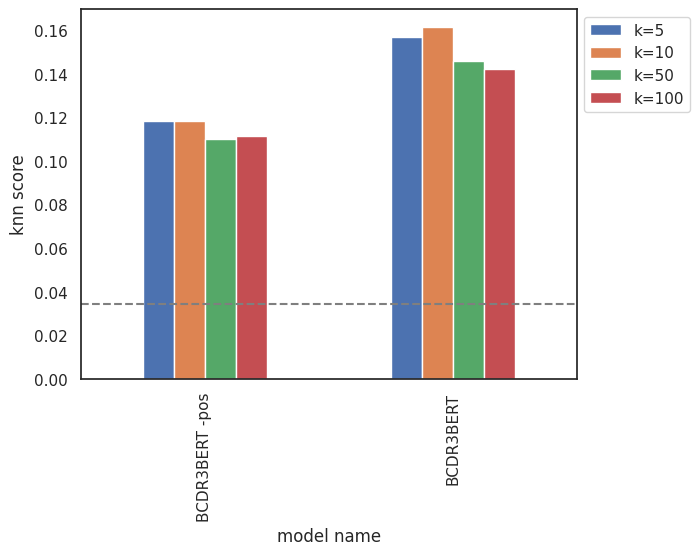

In [43]:
embedding_info = knn_scores.loc[['BCDR3BERT -pos', 'BCDR3BERT']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### What about alternate position embeddings?

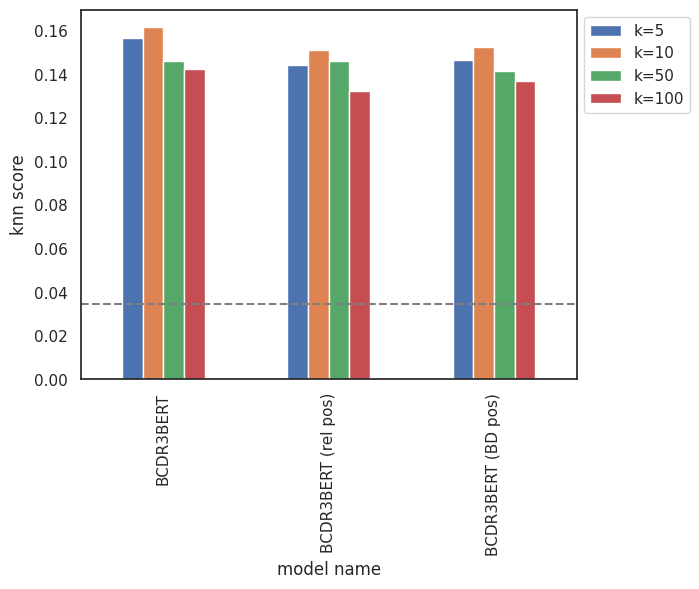

In [44]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'BCDR3BERT (rel pos)', 'BCDR3BERT (BD pos)']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

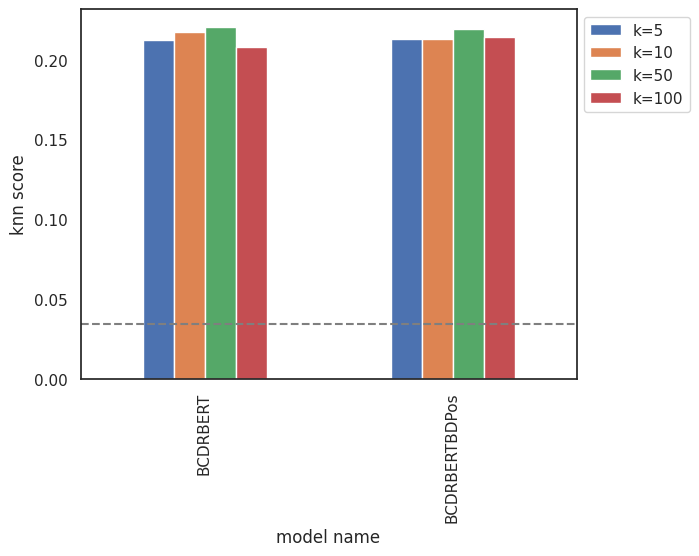

In [55]:
embedding_info = knn_scores.loc[['BCDRBERT', 'BCDRBERTBDPos']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn better with V gene info?

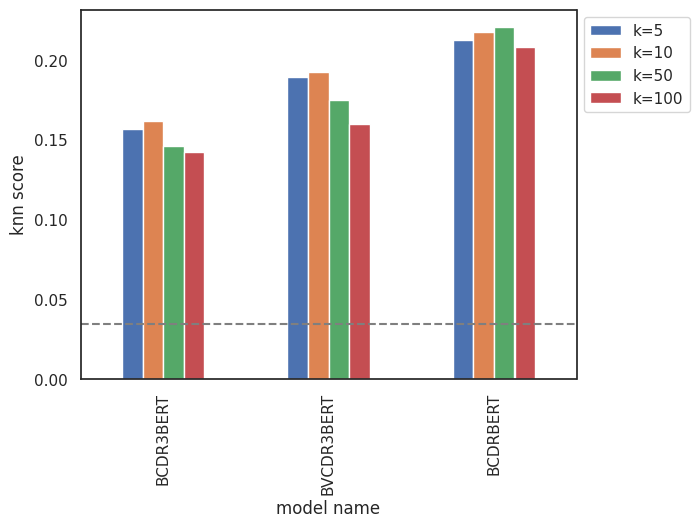

In [45]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'BVCDR3BERT', 'BCDRBERT']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does it learn with autocontrastive learning?

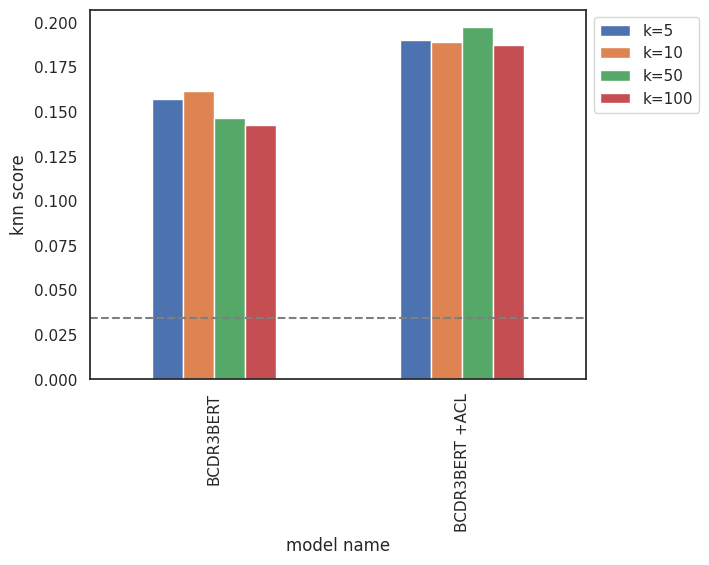

In [46]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'BCDR3BERT +ACL']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

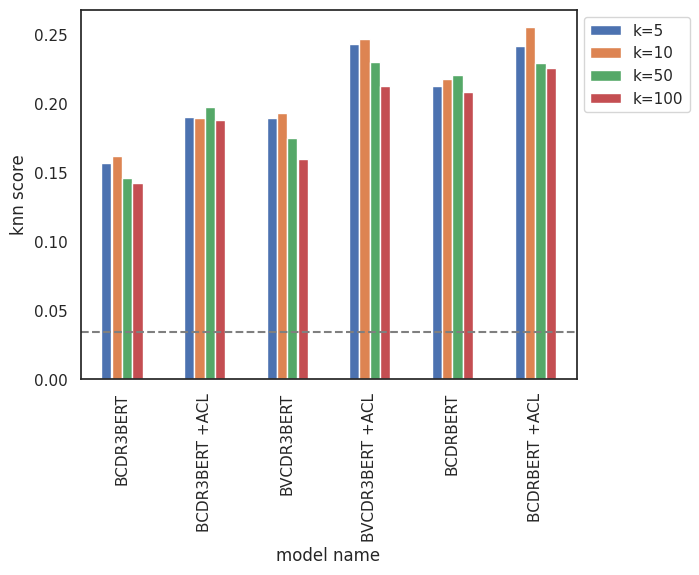

In [47]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'BCDR3BERT +ACL', 'BVCDR3BERT', 'BVCDR3BERT +ACL', 'BCDRBERT', 'BCDRBERT +ACL']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Does autocontrastive learning work better with censoring?

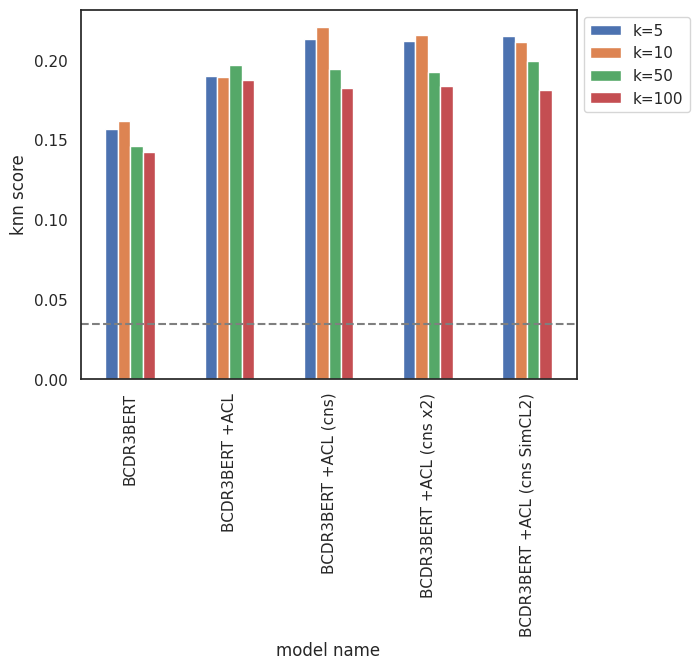

In [48]:
embedding_info = knn_scores.loc[['BCDR3BERT', 'BCDR3BERT +ACL', 'BCDR3BERT +ACL (cns)', 'BCDR3BERT +ACL (cns x2)', 'BCDR3BERT +ACL (cns SimCL2)']]
embedding_info_plot = embedding_info.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')
seaborn.move_legend(embedding_info_plot, 'upper left', bbox_to_anchor=(1, 1))

### Is it better than levenshtein?

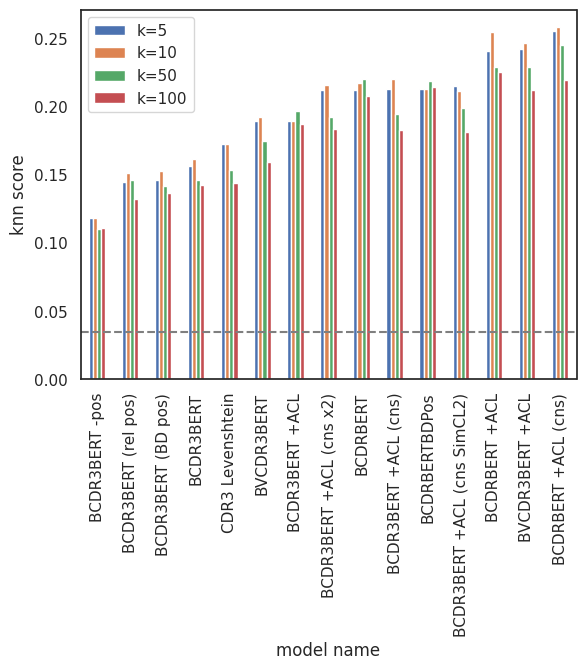

In [49]:
knn_scores.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/29, color='tab:grey', linestyle='dashed')

## Alignment and Uniformity

In [50]:
alnunf = {mdict['model_name']: {'alignment': mdict['alignment'], 'uniformity': mdict['uniformity'], '5nn accuracy': mdict['knn_scores']['5']} for mdict in metric_dicts}
alnunf = pd.DataFrame.from_dict(alnunf, orient='index')
alnunf = alnunf.sort_index()
alnunf['alignment + uniformity'] = alnunf['alignment'] + alnunf['uniformity']
alnunf['-uniformity'] = -alnunf['uniformity']
alnunf = alnunf[alnunf.index != 'CDR3 Levenshtein']

### Alignment + uniformity vs 5-NN performance

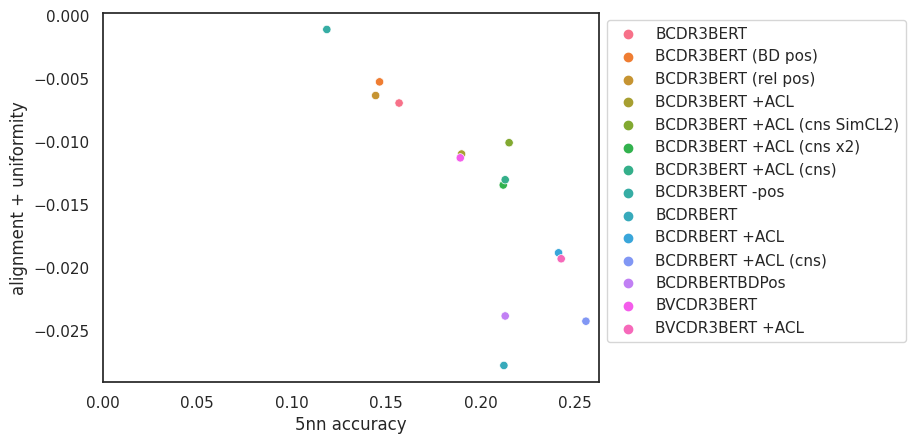

In [51]:
scatter_model_names = seaborn.scatterplot(alnunf, x='5nn accuracy', y='alignment + uniformity', hue=alnunf.index)
scatter_model_names.set_xlim(0)
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

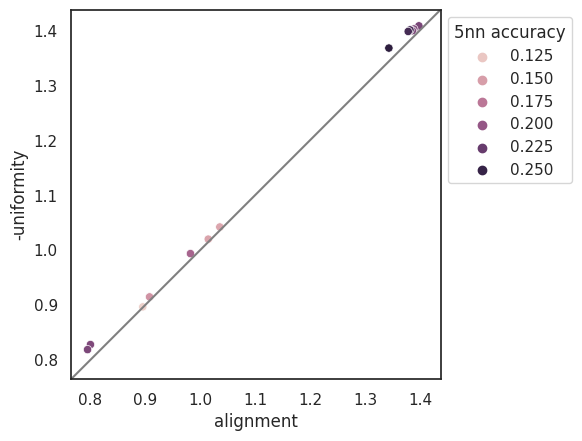

In [52]:
scatter_model_names = seaborn.scatterplot(alnunf, x='alignment', y='-uniformity', hue='5nn accuracy')

lims = [
    min([*scatter_model_names.get_xlim(), *scatter_model_names.get_ylim()]),
    max([*scatter_model_names.get_xlim(), *scatter_model_names.get_ylim()])
]
scatter_model_names.plot(lims, lims, color='grey')
scatter_model_names.set_aspect('equal')
scatter_model_names.set_xlim(lims)
scatter_model_names.set_ylim(lims)

seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()